# Price Rate of Change indicator ( ROC)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# from datetime import date

from mod_my_utils.read_write_data import *


In [3]:
# symbols = ["HDFC", 'RELIANCE', 'TCS', 'HINDUNILVR', 'INFY', 'HDFC', 'BHARTIARTL', 'ITC', 'ASIANPAINT', 'NESTLEIND', 'HCLTECH', 'SBI', 'SBIN']

In [4]:
# symbol = symbols[0]
# data_source = "yahoo"
# # MM/DD/YYYY
# start_date = "1/1/2010"
# end_date = "1/1/2015"
# print(start_date)
# print(end_date)
# # print(symbol)

In [5]:
# stock_data = get_price_yahoo(symbol=symbol, data_source=data_source, start_date= start_date, end_date= end_date )

In [6]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'

In [7]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


In [8]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


### Rate of change

### ROC with a period

In [9]:
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


<AxesSubplot:xlabel='Date'>

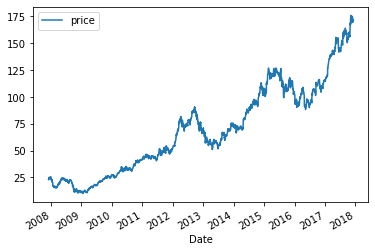

In [10]:
data.plot()

In [11]:
data['price'].diff(3)

Date
2007-12-03         NaN
2007-12-04         NaN
2007-12-05         NaN
2007-12-06    1.425579
2007-12-07    1.862167
                ...   
2017-11-27    0.950000
2017-11-28   -1.890000
2017-11-29   -5.490000
2017-11-30   -2.240000
2017-12-01   -2.020000
Name: price, Length: 2517, dtype: float64

In [12]:
# period = 10
# data['change10'] = data['price'].diff(period)
# data['shift10'] = data['price'].shift(period)
# data['roc10'] = data['change10'] / data['shift10']
# data.head(10)

In [13]:
period = 20
data['change' + str(period)] = data['price'].diff(period)
data['shift' + str(period)] = data['price'].shift(period)
data['roc' + str(period)] = data['change' + str(period)] / data['shift' + str(period)]
data.tail(20)

,price,change20,shift20,roc20
Date,,,,
2017-11-02,168.11,12.720,155.390,0.081859
2017-11-03,172.50,17.200,155.300,0.110753
2017-11-06,174.25,18.410,155.840,0.118134
2017-11-07,174.81,18.910,155.900,0.121296
2017-11-09,175.88,19.330,156.550,0.123475
2017-11-10,174.67,18.670,156.000,0.119679
2017-11-13,173.97,16.980,156.990,0.108160
2017-11-14,171.34,11.460,159.880,0.071679
2017-11-15,169.08,8.610,160.470,0.053655


In [14]:
data.head()

,price,change20,shift20,roc20
Date,,,,
2007-12-03,22.986003,NaN,NaN,NaN
2007-12-04,23.108091,NaN,NaN,NaN
2007-12-05,23.839335,NaN,NaN,NaN
2007-12-06,24.411582,NaN,NaN,NaN
2007-12-07,24.970258,NaN,NaN,NaN


### Method for ROC

In [15]:
def get_roc(data, period):
    """
    Rate of change indicator 
    This method create roc values
    Parameters
    -------------
    Input: 
    - Data frame with price column
    - period
    return: Data frame with price, diff, ROC of n period
    """
    roc_data = pd.DataFrame(index=data.index)
    roc_data['price'] = data['price']
    roc_data['roc' + str(period)] = roc_data['price'].diff(periods=period) / roc_data['price'].shift(periods=period)
    return roc_data

## To generate signals using ROC

In [16]:
roc = get_roc(data[['price']], period)

In [17]:
roc.head(20)

,price,roc20
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,NaN
2007-12-05,23.839335,NaN
2007-12-06,24.411582,NaN
2007-12-07,24.970258,NaN
2007-12-10,24.958692,NaN
2007-12-11,24.230069,NaN
2007-12-12,24.528170,NaN
2007-12-13,24.652829,NaN


<AxesSubplot:xlabel='Date'>

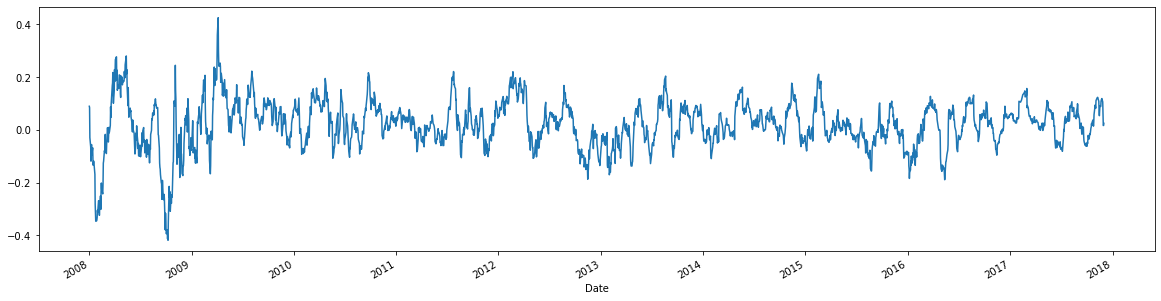

In [18]:
roc['roc' + str(period)].plot(figsize=(20,5))

### Signal generation

In [19]:
buy_threshold = -0.2
sell_threshold = 0.2

In [20]:
def get_roc_signal(data, period, buy_threshold, sell_threshold):
    """
    Get ROC signals
    Input: data frame with price, ROC values for given period 
    Ouput: price, buy sell signals
    """
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data['price']
    signals['buy']= 0.0
    signals['sell']= 0.0
    signals['buy'] = np.where(data['roc' + str(period)] < buy_threshold, -1.0, 0.0)
    signals['sell'] = np.where(data['roc' + str(period)] > sell_threshold, 1.0, 0.0)
    signals['buy'] = signals['buy'].diff()
    signals['sell'] = signals['sell'].diff()
    signals.loc[signals['buy']==-1.0,['buy']] = 0.0 
    signals.loc[signals['sell']== 1.0,['sell']] = 0.0 
    signals['buy_sell'] = signals['buy'] + signals['sell']
    return signals[['price', 'buy_sell']]

In [21]:
roc.head()

,price,roc20
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,NaN
2007-12-05,23.839335,NaN
2007-12-06,24.411582,NaN
2007-12-07,24.970258,NaN


In [22]:
signals = get_roc_signal(roc, period, buy_threshold, sell_threshold)

In [23]:
signals.head(30)

,price,buy_sell
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,0.0
2007-12-05,23.839335,0.0
2007-12-06,24.411582,0.0
2007-12-07,24.970258,0.0
2007-12-10,24.958692,0.0
2007-12-11,24.230069,0.0
2007-12-12,24.528170,0.0
2007-12-13,24.652829,0.0


<AxesSubplot:xlabel='Date'>

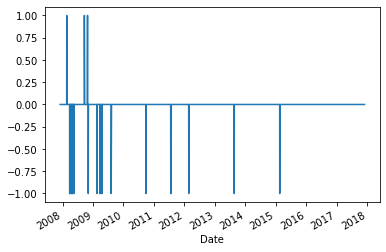

In [24]:
signals.buy_sell.plot()

<AxesSubplot:xlabel='Date'>

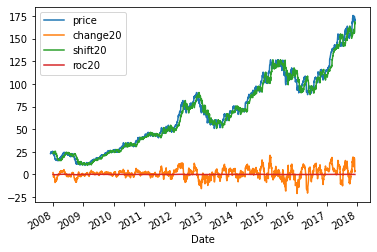

In [25]:
data.plot()

In [32]:
def plot_roc_buy_sell(data, signals, period, buy_threshold, sell_threshold):
    graph = plt.figure(figsize = (15,15))
    sp1 = graph.add_subplot(311)
    sp2 = graph.add_subplot(312)
#     sp3 = graph.add_subplot(312)
    data["roc" + str(period)].plot(ax=sp1,title = "ROC Plot",color = "r", linewidth = 0.5)
    sp1.axhline(y= sell_threshold, color = "b", lw = 7.)
    sp1.axhline(y= buy_threshold, color = "g", lw = 7.)
    sp1.axhline(y= 0, color = "k", lw = 5.)

    signals["price"].plot(ax = sp2)
    sp2.plot(signals.loc[signals.buy_sell == 1].index, signals.price[signals.buy_sell == 1], "^", markersize = 12, color = "k")
    sp2.plot(signals.loc[signals.buy_sell ==-1].index, signals.price[signals.buy_sell ==-1], "v", markersize = 12, color = "m")
    plt.show()

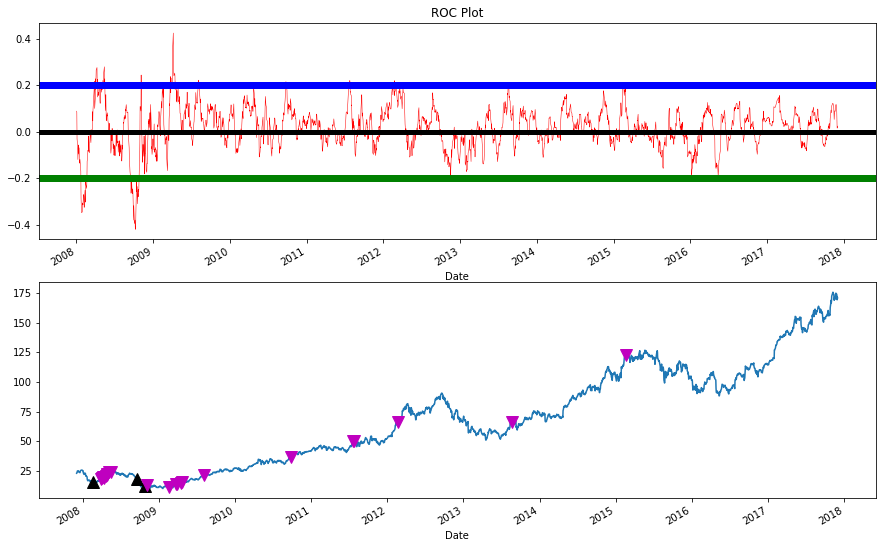

In [34]:
plot_roc_buy_sell(data, signals, period, buy_threshold, sell_threshold)